In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import (
    explained_variance_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

In [3]:
def regression_results(y_true, y_pred, regr_type):

    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print("Evaluation metrics for " + regr_type + "Linear Regression")
    print("Explained Variance: ", round(ev, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mae, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))
    print()

In [4]:
# Generate simple dataset with one feature
noise = 1
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + noise * np.random.randn(1000, 1)  # Linear relationship with some noise
y_ideal = 4 + 3 * X
# Specify the portion of the dataset to add outliers (e.g., the last 20%)
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5  # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten() > threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5  # Number of outliers to add
# randomly choose 5 outliers from outlier_indices
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

# Modify the target values at these indices to create outliers (add significant noise)
y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

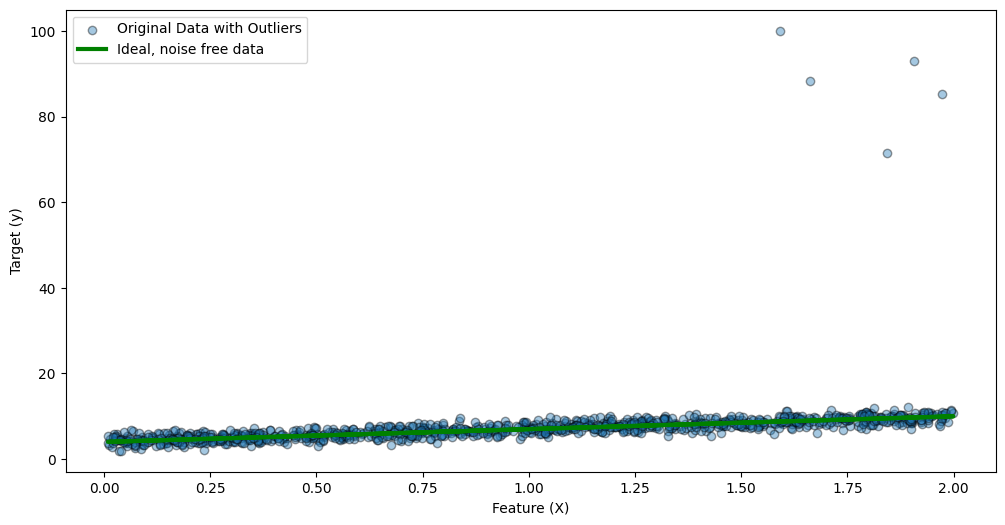

In [5]:
# Plot the data with outliers and the ideal fit line
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y_outlier, alpha=0.4, ec="k", label="Original Data with Outliers")
plt.plot(X, y_ideal, linewidth=3, color="g", label="Ideal, noise free data")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("")
plt.legend()
plt.show()

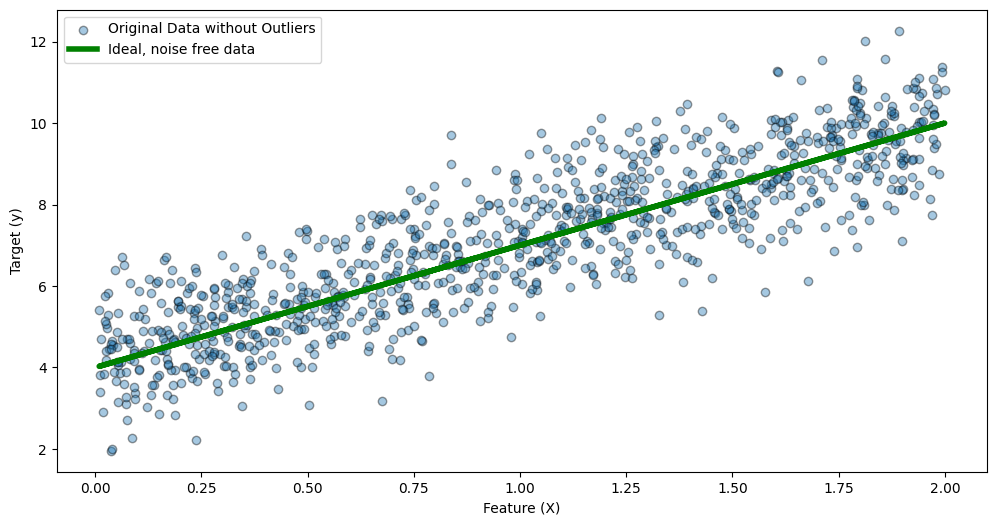

In [ ]:
# Plot the data without the outliers and the ideal fit line
plt.figure(figsize=(12, 6))

plt.scatter(X, y, alpha=0.4, ec="k", label="Original Data without Outliers")
plt.plot(X, y_ideal, linewidth=4, color="g", label="Ideal, noise free data")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("")
plt.legend()
plt.show()